# Titanic: Machine Learning from Disaster

![Titanic](images\TitanicSinking.jpg)

### Problem Statement:

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we will analyze of what sorts of people were likely to survive. We will use machine learning to predict which passengers survived the tragedy.

### Workflow
<ol>
<li>Fetch the data</li>
<li>Exploratory data analysis through visualization</li>
<li>Wrangle and clean the data</li>
<li>Model, predict and solve the problem</li>
<li>Compare the efficiency of different models</li>
<li>Submit the results</li>
</ol>

Let's get started!!

### 1. Fetch the data

Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline

In [2]:
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


Get the training and test data set

In [8]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

### 2. Exploratory data analysis

Lets analyze the data

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Looking above, the data is a mix of integers and objects. We can identify the different types of data- <br>
* <b>Target</b> --> Survived
* <b>Numeric</b> 
 * <b>Discrete</b> --> PassengerId, SibSp, Parch
 * <b>Continous</b> --> Age, Fare
* <b>Categorical</b>
 * <b>Ordinal</b> --> Pclass
 * <b>Nominal</b> --> Name, Sex, Cabin, Embarked
* <b>Mixed</b> --> Ticket

Let's check what data is missing

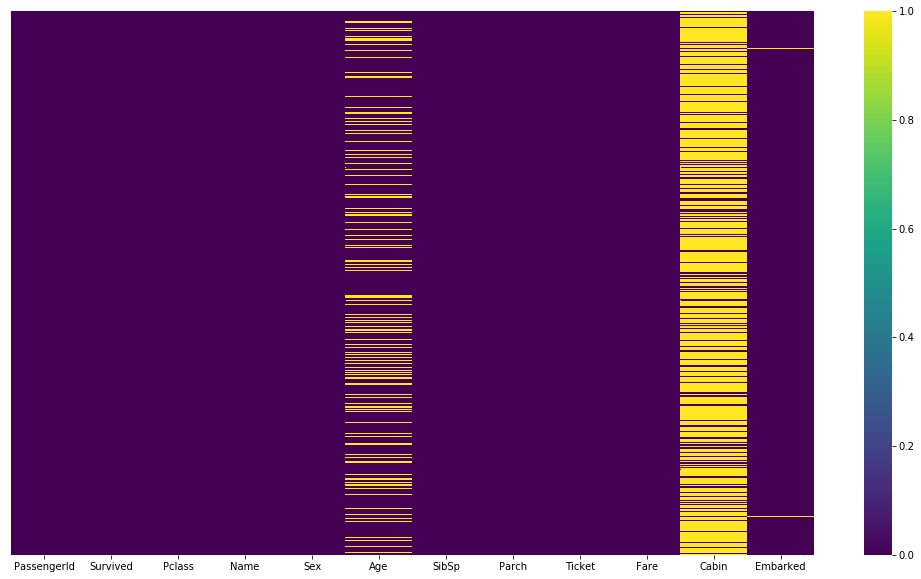

In [11]:
plt.figure(figsize=(18,10))
sns.heatmap(data=train.isnull(), cmap='viridis', yticklabels=False)

The yellow lines above signifies the presence of null values for the corresponding feature. <br>
Age, Cabin and Embarked have missing values (Cabin > Age > Embarked)

In [12]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"O'Leary, Miss. Hanora ""Norah""",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Some observations based on the statistics above
* 38 % of the passengers survived from the sample data
* Less than 25 % passengers were from Class 1
* Majority passengers were males (~64 %)
* There were infant as young as 0.4 years onboard
* More than 75 % of passengers were aged 38 and below, mean being ~30
* Most of the passengers were travelling alone
* For some passengers, Fare was as high as $ 512
* Most of the passengers embarked at the port S (~75 %)

Before moving forward we will make some hypothesis and check if we are able to validate it successfully. <br>
One point to note is according to the code of conduct at that time, states that the women and children were to be saved first in a life-threatening situation. <br>
<a href="https://en.wikipedia.org/wiki/Women_and_children_first">Reference- Wikipedia</a> 


<b>Assumptions</b>
* Females tend to survive more than males
* Kids tend to survive more than adults
* Class 1 passengers tend to survive more than other class passengers 

In [13]:
train[['Sex', 'Survived']].groupby('Sex').mean().iplot(kind='bar', colors='blue', title='Survival Rate based on Gender')

Around 74% females in the sample survived compared to 18% males.
Our 1st assumption seems to hold true.

In [14]:
survived = train[train['Survived'] == 1]['Age']
not_survived = train[train['Survived'] == 0]['Age']

cf.subplots([survived.figure(kind='hist', colors='blue'), not_survived.figure(kind='hist', colors='blue')],
            shared_yaxes=True, subplot_titles=['Survived', 'Not Survived']).iplot()

The histogram above shows us that survival rate of children is more compared to adults. <br>
Few more observations:
* Infant (Age < 5) survival rate is more <br>
* Most of the passengers aged between 15 to 35 did not survived <br>
* Very few of the oldest passengers (Age=80) survived

In [15]:
train[['Pclass', 'Survived']].groupby('Pclass').mean().iplot(kind='bar', colors='blue', title='Survival Rate based on Passenger Class')

Class 1 passengers clearly had the highest survival rate followed by Class 2 and 3 

In [16]:
train[['Embarked', 'Survived']].groupby('Embarked').mean().iplot(kind='bar', colors='blue', title='Survival Rate based on Port of Embarkment')

Based on the figure above, passengers embarked at C tend to survive more. However, there is no big difference compared to other ports as such. Let's see if we can use this to create new feature or skip this feature altogether. 

In [17]:
sibSp = train[['SibSp', 'Survived']].groupby('SibSp').mean().iplot(kind='bar', colors='blue', title='Survival Rate based on Spouse or number of Siblings')

In [18]:
parCh = train[['Parch', 'Survived']].groupby('Parch').mean().iplot(kind='bar', colors='blue', title='Survival Rate based on presence of Parents or Children')

Both the graps above for Spouse/Siblings and Parents/Children doesn't gives us much information. However, we can use this features to create a new feature called 'isAlone' which will denote if the passenger on-board was with family or alone

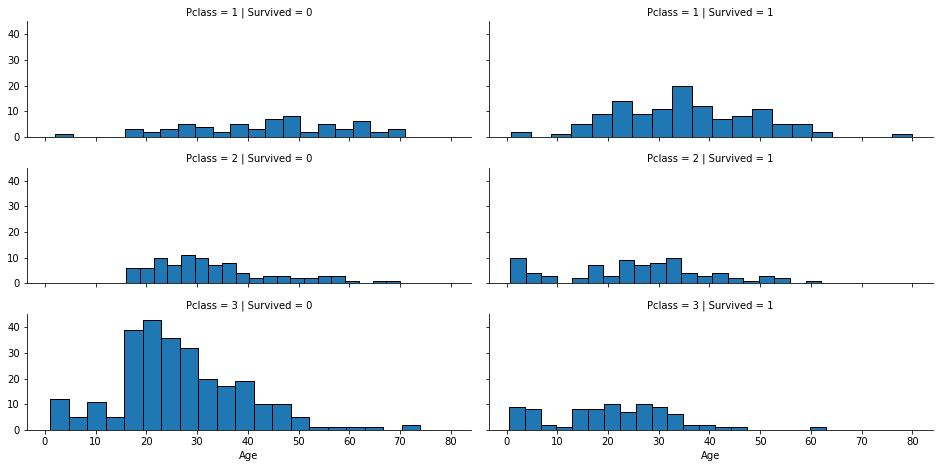

In [19]:
g = sns.FacetGrid(data=train, row='Pclass', col='Survived', size=2.2, aspect=3)
g.map(plt.hist, 'Age', bins=20, edgecolor='black')

Observations
* Middle aged passengers from Pclass 1 survived <br>
* Middle aged passengers from Pclass 3 did not survived <br>
* Most of the infants from Pclass 3 survived

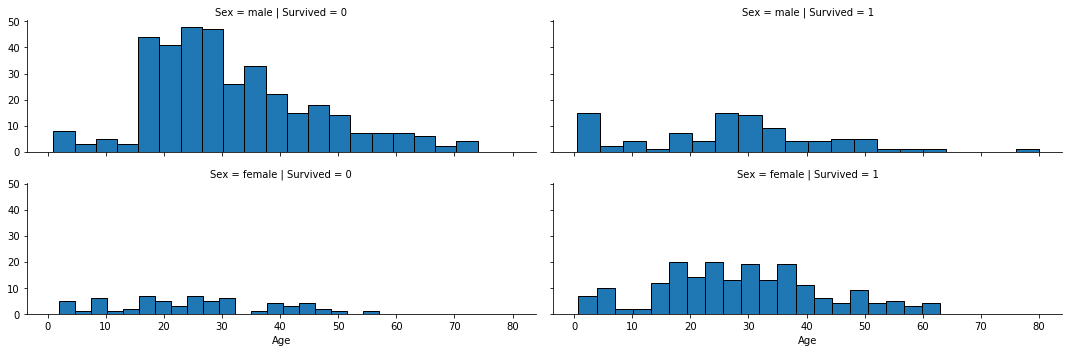

In [20]:
g = sns.FacetGrid(data=train, row='Sex', col='Survived', size=2.5, aspect=3)
g.map(plt.hist, 'Age', bins=20, edgecolor='black')

Observations
* Most of the males aged 20 to 35 did not survived <br>
* Most of the females aged 15 to 35 survived

Lets move on to clean the data and do some data wrangling!

### Data Wrangling / Cleansing

There are some features which does not add to the solution.
* PassengerId
* Ticket
* Fare
* Cabin

These features are not required and can be removed

In [21]:
combine = [train, test]
for ds in combine:
    ds.drop(labels=['Ticket', 'Fare', 'Cabin'], axis= 1, inplace= True) 

train.drop('PassengerId', axis=1, inplace=True)

In [22]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C


On a close look, there is a pattern for the name (surname followed by title and name) <br>
We can utilize the title in our dataset. Let's create a new feature called Title by stripping it from Name.

In [23]:
for ds in combine:
    ds['Title'] = ds['Name'].str.extract(pat= '([A-Za-z]+)\.', expand= False)


In [24]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

There are many titles present in the dataset. We need to minimize those titles to a few titles. <br>
A distribution will give us an idea on how the titles are spread

In [25]:
pd.crosstab(train['Sex'], train['Title'])

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


The relevant titles in which our data can be grouped are
* Mr
* Mrs
* Miss
* Master <br>

Rest others can be grouped into a single category called 'Rare'

In [26]:
for ds in combine:
    ds['Title'] = ds['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer'], 'Rare')
    
    ds['Title'] = ds['Title'].replace(['Ms', 'Mme', 'Lady', 'Mlle'], 'Miss')
    ds['Title'] = ds['Title'].replace(['Countess'], 'Mrs')
    ds['Title'] = ds['Title'].replace(['Major', 'Rev', 'Sir'], 'Mr')

In [27]:
train[['Title', 'Survived']].groupby('Title').mean().iplot(kind='bar', colors='blue', title='Survival based on Titles')

This strengthens our assumption about the survival based on gender

We can start with filling the missing values. There are features to be worked upon
* Age
* Embarked

The newly created feature Title can be used to fill the missing values for Age. <br>
Instead of getting the mean of whole dataset, we can take the median ages for each title and fill the missing Age values

In [28]:
def apply_median_age(values, df):
    for ds in combine:
        for title in values:
            median_age = ds.loc[ds['Title'] == title]['Age'].median()
            ds.loc[ds['Title'] == title, 'Age'] = ds.loc[ds['Title'] == title, 'Age'].fillna(median_age)


In [29]:
apply_median_age(train['Title'].unique(), combine)


In [30]:
train['Age'].isnull().sum()

0

In [31]:
train['Embarked'].isnull().sum()

2

For Embarked, only 2 values are missing. We can fill these missing values by the value which occured most i.e its mode

In [32]:
most_embarked = train['Embarked'].mode()[0]

for ds in combine:
    ds['Embarked'].fillna(value= most_embarked, inplace= True)

In [33]:
train['Embarked'].isnull().sum()

0

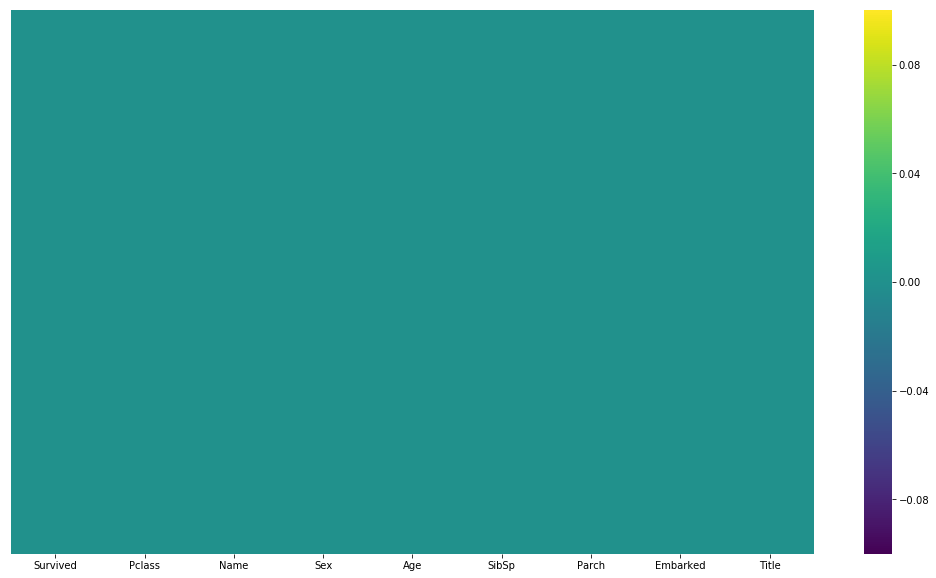

In [34]:
plt.figure(figsize=(18,10))
sns.heatmap(train.isnull(), yticklabels= False, cmap= 'viridis')

We have filled all the missing values in the dataset. Now we can move ahead and safely drop Name feature

In [35]:
for ds in combine:
    ds.drop(labels=['Name'], axis= 1, inplace= True)

The next steps to perform <br>
* Categorize the Age feature <br>
* Create a new feature IsAlone from SibSp and Parch <br>
* Encode the categorical features (Sex, Embarked, Title)

In [36]:
train['Age'].iplot(kind='hist', colors='blue', title='Age distribution')

Age can be categorized in
* Child (0 - 10) <br>
* Young and Adult (10 - 60) <br>
* Old (60 - 80)

In [37]:
def age_categories(value):
    if value <= 16:
        return 'Child'
    elif 16 < value <=60:
        return 'Young and Adult'
    else:
        return 'Old'

In [38]:
for ds in combine:
    ds['AgeType'] = ds['Age'].apply(age_categories)

In [39]:
train[['AgeType', 'Survived']].groupby('AgeType').mean().iplot(kind='bar', colors='blue', title='Survival Rate based on Age Type')

Now we will create a new feature from SibSp and Parch

In [40]:
for ds in combine:
    ds['FamilySize'] = ds['SibSp'] + ds['Parch'] + 1

In [41]:
for ds in combine:
    ds['IsAlone'] = 0
    ds.loc[ds['FamilySize'] == 1, 'IsAlone'] = 1

In [42]:
for ds in combine:
    ds['IsAlone'] = 0
    ds.loc[ds['FamilySize'] == 1, 'IsAlone'] = 1

In [43]:
train[['IsAlone', 'Survived']].groupby('IsAlone').mean().iplot(kind='bar', colors='blue', title="Survival Rate based on Family's presence")

The following features are not reqiured now. We can remove them safely
* Title
* FamilySize
* Age
* SibSp
* Parch

In [44]:
for ds in combine:
    ds.drop(labels=['Age', 'SibSp', 'Parch', 'Title', 'FamilySize'], axis=1, inplace=True)

In [45]:
train.head()

,Survived,Pclass,Sex,Embarked,AgeType,IsAlone
0,0,3,male,S,Young and Adult,0
1,1,1,female,C,Young and Adult,0
2,1,3,female,S,Young and Adult,1
3,1,1,female,S,Young and Adult,0
4,0,3,male,S,Young and Adult,1


We can proceed with encoding the categorical features. For encoding we will use pandas encoding

In [46]:
train = pd.get_dummies(train)
train.head()

,Survived,Pclass,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeType_Child,AgeType_Old,AgeType_Young and Adult
0,0,3,0,0,1,0,0,1,0,0,1
1,1,1,0,1,0,1,0,0,0,0,1
2,1,3,1,1,0,0,0,1,0,0,1
3,1,1,0,1,0,0,0,1,0,0,1
4,0,3,1,0,1,0,0,1,0,0,1


In [47]:
test = pd.get_dummies(test)
test.head()

,PassengerId,Pclass,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeType_Child,AgeType_Old,AgeType_Young and Adult
0,892,3,1,0,1,0,1,0,0,0,1
1,893,3,0,1,0,0,0,1,0,0,1
2,894,2,1,0,1,0,1,0,0,1,0
3,895,3,1,0,1,0,0,1,0,0,1
4,896,3,0,1,0,0,0,1,0,0,1


The data is fairly prepared now. Its time to use it in our models. Lets build our model

### Model, Predict and Solve

Since we need to predict if the passenger survived or not, this is a classification problem and falls in the category of supervised machine learning as we have the sample data

In [48]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop('PassengerId', axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 10), (891,), (418, 10))

We wil start with Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score

79.909999999999997

Not bad for a beginner!!
Lets see with SVC and Linear SVC

In [50]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

svc_score = round(svc.score(X_train, y_train) * 100, 2)
svc_score

79.909999999999997

In [51]:
linsvc = LinearSVC()
linsvc.fit(X_train, y_train)
y_pred = linsvc.predict(X_test)

linsvc_score = round(linsvc.score(X_train, y_train) * 100, 2)
linsvc_score

78.900000000000006

Will try with decision trees

In [52]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)
y_pred = dectree.predict(X_test)

dectree_score = round(dectree.score(X_train, y_train) * 100, 2)
dectree_score

83.049999999999997

In [53]:
from sklearn.ensemble import RandomForestClassifier

randcls = RandomForestClassifier()
randcls.fit(X_train, y_train)
y_pred = randcls.predict(X_test)

randcls_score = round(randcls.score(X_train, y_train) * 100, 2)
randcls_score

82.719999999999999

Clearly Randomforest and DecisionTree score the maximum. We will go ahead with RandomForest

### Submission

In [54]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('output\gender_submission.csv', index=False)